In [1]:
import math
import random
import numpy
from functools import reduce
import sys
import re
from matplotlib import pyplot as plt
# http://www.dca.fee.unicamp.br/projects/infobiosys/vrp/

In [2]:
alfa = 2
beta = 5
ro = 0.8
th = 80
fileName = "eg1.txt"
iterations = 20
ants = 22

In [3]:
xcoord=[]
ycoord=[]
pointnum=[]

def getData(fileName):
    f = open(fileName, "r")
    content = f.read()
    optimalValue = re.search("Optimal value: (\d+)", content, re.MULTILINE)
    if(optimalValue != None):
        optimalValue = optimalValue.group(1)
    else:
        optimalValue = re.search("Best value: (\d+)", content, re.MULTILINE)
        if(optimalValue != None):
            optimalValue = optimalValue.group(1)
    capacity = re.search("^CAPACITY : (\d+)$", content, re.MULTILINE).group(1)
    graph = re.findall(r"^(\d+) (\d+) (\d+)$", content, re.MULTILINE)
    demand = re.findall(r"^(\d+) (\d+)$", content, re.MULTILINE)
    graph = {int(a):(int(b),int(c)) for a,b,c in graph}
    demand = {int(a):int(b) for a,b in demand}
    capacity = int(capacity)
    optimalValue = int(optimalValue)
    return capacity, graph, demand, optimalValue

def generateGraph():
    capacityLimit, graph, demand, optimalValue = getData(fileName)
    vertices = list(graph.keys())
    vertices.remove(1)
    
    for i in range(len(graph)):
        xcoord.append(graph[i+1][0])
        ycoord.append(graph[i+1][1])
        pointnum.append(i+1)

    edges = { (min(a,b),max(a,b)) : numpy.sqrt((graph[a][0]-graph[b][0])**2 + (graph[a][1]-graph[b][1])**2) for a in graph.keys() for b in graph.keys()}
    feromones = { (min(a,b),max(a,b)) : 1 for a in graph.keys() for b in graph.keys() if a!=b }
    return vertices, edges, capacityLimit, demand, feromones, optimalValue

In [4]:
def solutionOfOneAnt(vertices, edges, capacityLimit, demand, feromones):
    solution = list()

    while(len(vertices)!=0):
        path = list()
        city = numpy.random.choice(vertices)
        capacity = capacityLimit - demand[city]
        path.append(city)
        vertices.remove(city)
        while(len(vertices)!=0):
            probabilities = list(map(lambda x: ((feromones[(min(x,city), max(x,city))])**alfa)*((1/edges[(min(x,city), max(x,city))])**beta), vertices))
            probabilities = probabilities/numpy.sum(probabilities)
            
            city = numpy.random.choice(vertices, p=probabilities)
            capacity = capacity - demand[city]

            if(capacity>0):
                path.append(city)
                vertices.remove(city)
            else:
                break
        solution.append(path)
    return solution, city

def rateSolution(solution, edges):
    s = 0
    for i in solution:
        a = 1
        for j in i:
            b = j
            s = s + edges[(min(a,b), max(a,b))]
            a = b
        b = 1
        s = s + edges[(min(a,b), max(a,b))]
    return s

def updateFeromone(feromones, solutions, bestSolution):
    Lavg = reduce(lambda x,y: x+y, (i[1] for i in solutions))/len(solutions)
    feromones = { k : (ro + th/Lavg)*v for (k,v) in feromones.items() }
    solutions.sort(key = lambda x: x[1])
    if(bestSolution!=None):
        if(solutions[0][1] < bestSolution[1]):
            bestSolution = solutions[0]
        for path in bestSolution[0]:
            for i in range(len(path)-1):
                feromones[(min(path[i],path[i+1]), max(path[i],path[i+1]))] = 3/bestSolution[1] + feromones[(min(path[i],path[i+1]), max(path[i],path[i+1]))]
    else:
        bestSolution = solutions[0]
    return bestSolution

In [5]:
def run():
    bestSolution = None
    vertices, edges, capacityLimit, demand, feromones, optimalValue = generateGraph()
    
    for i in range(iterations):
        solutions = []
        for _ in range(ants):
            solution, city = solutionOfOneAnt(vertices.copy(), edges, capacityLimit, demand, feromones)
            solutions.append((solution, rateSolution(solution, edges)))
        bestSolution = updateFeromone(feromones, solutions, bestSolution)
        print(str(i)+":\t"+str(int(bestSolution[1]))+"\t"+str(optimalValue))
#         print(solutions)
#         print(city,end="\n\n")
#         print("Path taken:"+str(bestSolution[0])+"\n")
    return bestSolution

In [10]:
alfa = 2
beta = 5
iterations = 100
ants = 30

solution = run()

0:	427	375
1:	416	375
2:	416	375
3:	416	375
4:	416	375
5:	416	375
6:	416	375
7:	416	375
8:	416	375
9:	416	375
10:	416	375
11:	416	375
12:	416	375
13:	416	375
14:	416	375
15:	415	375
16:	415	375
17:	415	375
18:	415	375
19:	415	375
20:	415	375
21:	415	375
22:	415	375
23:	415	375
24:	390	375
25:	390	375
26:	390	375
27:	390	375
28:	390	375
29:	390	375
30:	390	375
31:	390	375
32:	390	375
33:	390	375
34:	390	375
35:	390	375
36:	390	375
37:	390	375
38:	390	375
39:	390	375
40:	390	375
41:	390	375
42:	390	375
43:	390	375
44:	390	375
45:	390	375
46:	390	375
47:	390	375
48:	390	375
49:	390	375
50:	390	375
51:	390	375
52:	390	375
53:	390	375
54:	390	375
55:	390	375
56:	390	375
57:	390	375
58:	390	375
59:	390	375
60:	390	375
61:	390	375
62:	390	375
63:	390	375
64:	390	375
65:	390	375
66:	390	375
67:	390	375
68:	390	375
69:	390	375
70:	390	375
71:	390	375
72:	390	375
73:	390	375
74:	390	375
75:	390	375
76:	390	375
77:	390	375
78:	390	375
79:	390	375
80:	390	375
81:	390	375
82:	390	375
83:	390	375
84

In [11]:
print("Found solution: \t %0.3f" % (solution[1]))
print("Path: \n"+str(solution[0]))

if(fileName=="eg1.txt"):
    optimalSolution = ([[18, 21, 19, 16, 13], [17, 20, 22, 15], [14, 12, 5, 4, 9, 11], [10, 8, 6, 3, 2, 7]], 375)
    print("\nOptimal solution: \t"+str(optimalSolution[1]))
    print("Optimal Path: \n"+str(optimalSolution[0]))

print("\nfile name:\t"+str(fileName)+ "\nalpha:\t\t"+str(alfa)+ "\nbeta:\t\t"+str(beta)+
      "\nrho:\t\t"+str(ro)+ "\ntheta:\t\t"+str(th)+ "\niterations:\t"+str(iterations)+ 
      "\nnumber of ants:\t"+str(ants)+"\n")

Found solution: 	 390.347
Path: 
[[11, 7, 9, 4, 5, 12, 14], [18, 21, 19, 16, 13], [2, 3, 6, 8, 10], [20, 22, 17, 15]]

Optimal solution: 	375
Optimal Path: 
[[18, 21, 19, 16, 13], [17, 20, 22, 15], [14, 12, 5, 4, 9, 11], [10, 8, 6, 3, 2, 7]]

file name:	eg1.txt
alpha:		2
beta:		5
rho:		0.8
theta:		80
iterations:	100
number of ants:	30



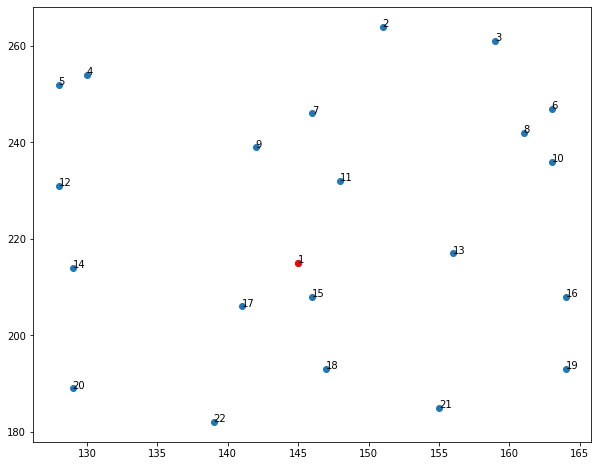

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(xcoord,ycoord)
plt.scatter(xcoord[0],ycoord[0],color="red")

for i,txt in enumerate(pointnum):
    plt.annotate(txt, (xcoord[i],ycoord[i]))